In [1]:
"""
Today we are going to be looking at decision trees. The way they work is by literally assembling a decision tree, 
where they learn what questions they should ask that will help accurately determine whether a data point is X, y, z. 
One question will lead to another and on and on ... until it stops. If you are curious we use CART algorithm for training
such decision trees in sealion.They are extremely powerful, sometimes too much. Today we are going to 
applying them to the titanic dataset, where we will predict whether or not somebody would survive or die. 
This how advanced machine learning has become. 
"""

# first let's import sealion and get what we need
import sealion as sl 
from sealion.decision_trees import DecisionTree
import pandas as pd # we need this for reading in the csv file

In [2]:
# first we can load in the dataset
titanic_dataframe = pd.read_csv("titanic_dataset.csv") # of my local computer
titanic_dataframe # print it out

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# looks like it has 891 rows and 12 columns. First we can delete some of the features we know we won't use. 
titanic_dataframe = titanic_dataframe.drop(['Name', 'Ticket', 'Cabin'], axis = 1) # non-numeric
titanic_dataframe = titanic_dataframe.fillna(0)

In [4]:
# next we can change the sex column. Female will be 0 and Male will be 1. 
import numpy as np # we'll need this too
sex_col = np.array(titanic_dataframe['Sex'])
sex_col[np.where(sex_col == "male")] = 0
sex_col[np.where(sex_col == "female")] = 1
titanic_dataframe["Sex"]  = sex_col

# we can also change the embarked column - we will make it one-hot-encoded
from sealion.utils import one_hot
embarked_col = np.array(titanic_dataframe["Embarked"])
embarked_col[np.where(embarked_col == "S")] = 0
embarked_col[np.where(embarked_col == "C")] = 1
embarked_col[np.where(embarked_col == "Q")] = 2 
titanic_dataframe["Embarked"] = embarked_col
titanic_dataframe

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,0
4,5,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0
887,888,1,1,1,19.0,0,0,30.0000,0
888,889,0,3,1,0.0,1,2,23.4500,0
889,890,1,1,0,26.0,0,0,30.0000,1


In [5]:
# looks like we are all set. Time to get the labels and the training and testing data
y = np.array(titanic_dataframe['Survived'])
titanic_dataframe = titanic_dataframe.drop('Survived', axis = 1)
X = np.array(titanic_dataframe)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [6]:
#we'll need to one_hot_encode the last column of X_train and X_test (Embarked)
embarked_train = one_hot(X_train[:, -1], depth = 3)
embarked_test = one_hot(X_test[:, -1], depth = 3)

In [7]:
# we'll have to use a bit of the long route to avoid typical rules of numpy
new_X_train, new_X_test = [], []
X_train, X_test = np.array(X_train).tolist(), np.array(X_test).tolist() # turn them into regular python lists
for row in range(len(X_train)) : 
    observation = X_train[row] # get the row
    observation[-1] = embarked_train[row].tolist() # .tolist() helps make sure it can be interpreted (only needed as of v3.0.8 if you are using one_hot_encoded data) 
    new_X_train.append(observation)
    
for row in range(len(X_test)) : 
    observation = X_test[row] # get the row
    observation[-1] = embarked_test[row].tolist()
    new_X_test.append(observation)

In [8]:
X_train, X_test = new_X_train, new_X_test # just change the name

In [9]:
# finally we can start using the decision trees algorithm!
dt = DecisionTree()
dt.fit(X_train, y_train) # note that the DecisionTree class is only for classification

In [10]:
#we'll let's see how it did
def evaluate(dt, X_train, y_train, X_test, y_test) : 
    print("Training accuracy : ", dt.evaluate(X_train, y_train))
    print("Testing accuracy : ", dt.evaluate(X_test, y_test))

evaluate(dt, X_train, y_train, X_test, y_test)

Training accuracy :  1.0
Testing accuracy :  0.7686567164179104


In [11]:
# woah that's some big overfitting. 
# because decision trees can go as deep as they want (meaning they can ask and ask questions), they can 
# almost always find a sequence of questions that are hyperspecific to the training data to get every data point right
# as you can see here, all training data was classified correctly, but only 3/4 of all testing data...

# luckily there are regularization techniques!
# the first is max_branches. A decision tree is really just what it sounds like - a bunch of questions in a tree fashion 
# to make a decision about whether a data point is X, y, z. If the tree is making 500 trees instead of 50 to 
# just get a few points in the training data correct, maybe we should stop that and end at the generalizing 50. 

# but before we do that we need to know how many trees their actually are. Luckily we have a good starting point : 

average_branches = dt.average_branches() # this is one of the stuff other libs don't do 
average_branches

7.0

In [12]:
# looks like we have 7 branches in total. Maybe we can add a max_branches = 4 term 
dt = DecisionTree(max_branches = 3)
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_test, y_test)

Training accuracy :  0.8203434610303831
Testing accuracy :  0.7611940298507462


In [13]:
# that seems to do a little bit better. Luckily there's another option as well. We can also use
# the min_samples parameter. Basically if when we are creating a tree we realize that we are only dealing with a 
# few samples and making many, many trees to make all of them sorted perfectly - we are overfitting. 
# we can just reduce this by setting a min_samples parameter
dt = DecisionTree(max_branches = 4, min_samples = 10)
dt.fit(X_train, y_train)
evaluate(dt, X_train, y_train, X_test, y_test) # this does slightly better

Training accuracy :  0.8731836195508587
Testing accuracy :  0.7985074626865671


In [14]:
# if you are curious, the way we build trees is through a lot recursion. We store the tree in a dictionary, which looks
# really, really long and repetitive. 

tree = dt.return_tree()
tree

{(2,
  1): {True: {(1,
    3): {True: {(6, 23.45): {True: 0.0,
      False: {(3, 8.0): {True: 0.0,
        False: {(6, 15.5): {True: 1.0,
          False: {(6, 8.05): {True: 0.0,
            False: {(5, 2): {True: 0.0,
              False: {(0, 265): {True: 1.0, False: 1.0}}}}}}}}}}}}, False: {(0,
      304): {True: {(0, 855): {True: 1.0,
        False: {(6, 151.55): {True: 1.0, False: 1.0}}}},
      False: {(0, 298): {True: 0.0,
        False: {(6, 30.0708): {True: 1.0,
          False: {(6, 28.7125): {True: 0.0,
            False: {(3, 29.0): {True: 1.0,
              False: {(3, 24.0): {True: {(5, 2): {True: 1.0, False: 0.0}},
                False: 1.0}}}}}}}}}}}}}}, False: {(6,
    26.2875): {True: {(0,
      391): {True: {(4, 4): {True: 0.0,
        False: {(3, 55.0): {True: 0.0,
          False: {(0, 742): {True: 0.0,
            False: {(0, 725): {True: 1.0,
              False: {(6, 26.55): {True: 1.0, False: 1.0}}}}}}}}}}, False: {(0,
        184): {True: {(0, 263): {True: 0.

In [19]:
# what we could do now is create another tree and implement that in our original dt class
dt_new = DecisionTree(max_branches = 5, min_samples = 5)
dt_new.fit(X_train, y_train)
tree = dt_new.return_tree()
dt.give_tree(tree) # insert the tree from dt_new and add it to dt
assert dt.return_tree() == dt_new.return_tree() == tree # they all share the same tree now

array([[68., 10.],
       [17., 39.]])

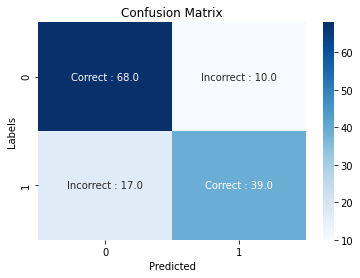

In [21]:
# of course if you retrain the model, this tree will be lost. 
# but for now you get to keep it and use it in the predict() method. This will be important for things like Random Forests
# where you may make 500 such decision trees, get the best one, and use it. 

# lastly we'll want to make a confusion matrix (just something I like to do)
from sealion.utils import confusion_matrix
y_pred = dt.predict(X_test)
confusion_matrix(y_pred, y_test) #always this order

In [ ]:
#It looks like we make more false positives than false negatives. This is good as then we are telling somebody more often
#that they will die (0) when they survive (1) instead of the opposite. Of course neither is optimal.

# well that looks like all for today's tutorial. We hope you enjoyed it, thanks!